In [14]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, auc

Pulled all the required libraries here again.

In [24]:
# Load the trained model
model = joblib.load("random_forest_model.pkl")
scaler = joblib.load("scaler.pkl")

The random forest model was pulled here.

In [23]:
# Load the dataset (if needed)
df = pd.read_csv("cleaned_adult_data_with_splits.csv")

# Select validation data
X_val = df[df["dataset_split"] == "validation"].drop(columns=["income", "dataset_split"])
y_val = df[df["dataset_split"] == "validation"]["income"]



X_val_scaled = scaler.transform(X_val)

# Generate predictions
y_pred = model.predict(X_val_scaled)

# Display predictions
print("Predictions on validation set:")
print(y_pred)

Predictions on validation set:
[1 1 0 ... 1 0 0]


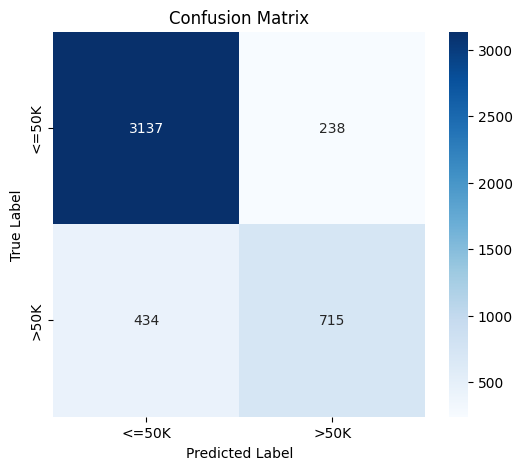

In [21]:
# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

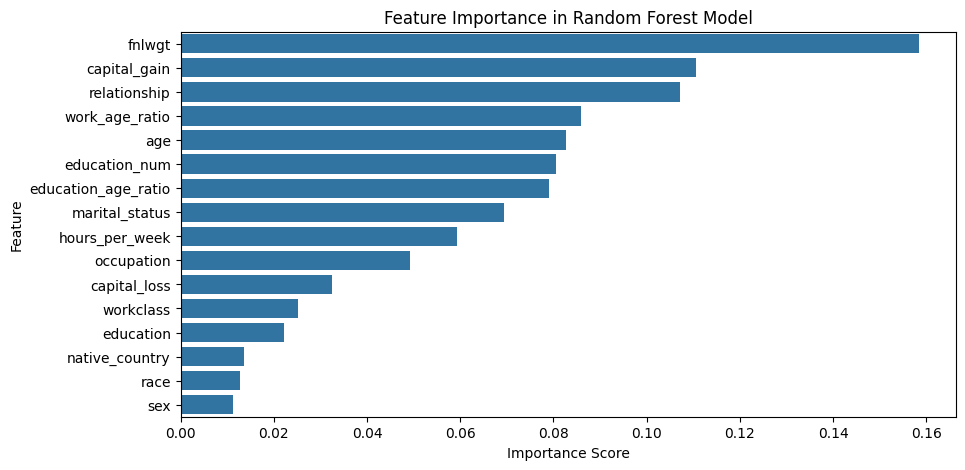

In [22]:
# Get feature importance
feature_importances = model.feature_importances_
features = X_val.columns

# Sort and plot
sorted_indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances[sorted_indices], y=[features[i] for i in sorted_indices])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.show()

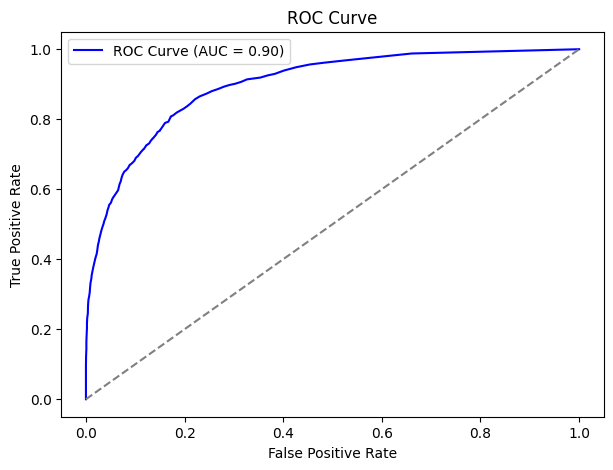

In [19]:
# Get model probabilities
y_probs = model.predict_proba(X_val_scaled)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_val, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#### When I looked at the predictions on the validation set, I could see which income group the model placed each person in. Adding up the predictions told me how many people were in each group. If there was a big skew—like the model predicting mostly one group—it indicated possible bias in the data or problems with how the model functioned. I also found that if the model was making more mistakes with one group than the others, it meant I needed to do some work on the features, balance the groups out, or tweak the settings of the model. Overall, these results told me how well the model was doing and pointed to where I could improve before I moved on to deployment.